In [2]:
import numpy as np
import kaplan
import os
import statistics
# scipy has lazy imports; import scipy will not load stats module
from scipy import stats
import matplotlib.pyplot as plt

In [11]:
np.random.seed(10)
energies = np.random.randint(55, 60, 10)
print(energies)

[56 59 55 56 58 59 56 55 56 57]


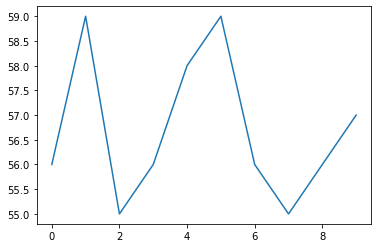

In [28]:
plt.plot(range(10), energies)

In [13]:
energy_stdev = statistics.stdev(energies)
print(energy_stdev)

1.4142135623730951


In [14]:
energy_min = min(energies)
print(energy_min)

55


In [15]:
energy_mean = statistics.mean(energies)
print(energy_mean)

56


In [16]:
# use z-score to normalise
# E_norm = (E-mean)/stdev
norm_energies = [(e-energy_mean)/energy_stdev for e in energies]
print(norm_energies)

[0.0, 2.1213203435596424, -0.7071067811865475, 0.0, 1.414213562373095, 2.1213203435596424, 0.0, -0.7071067811865475, 0.0, 0.7071067811865475]


In [17]:
# try lowest energy/stdev
print(energy_min/energy_stdev)

38.89087296526011


In [21]:
# using boxcox
energies_numpy = np.array(energies)
boxcox_energies = stats.boxcox(energies_numpy)
print(boxcox_energies)

(array([0.12328243, 0.12328243, 0.12328243, 0.12328243, 0.12328243,
       0.12328243, 0.12328243, 0.12328243, 0.12328243, 0.12328243]), -8.111456183101476)


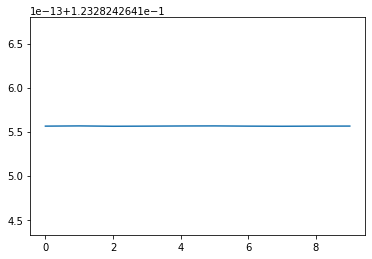

In [27]:
plt.plot(range(10), boxcox_energies[0])

In [17]:
class Test:
    
    def __init__(self, num_geoms):
        self.num_geoms = num_geoms
    
    def all_pairs_gen(self):
        """Yield indices of two geometries/conformers.

        Note
        ----
        This is a generator function.

        """
        for i in range(self.num_geoms-1):
            for j in range(i+1, self.num_geoms):
                yield (i, j)
    
    def print_this(self):
        print([(i,j,None) for i,j in self.all_pairs_gen()])
    
    @property
    def meow(self):
        return "hello"

In [30]:
t = Test(5)
t.print_this()

[(0, 1, None), (0, 2, None), (0, 3, None), (0, 4, None), (1, 2, None), (1, 3, None), (1, 4, None), (2, 3, None), (2, 4, None), (3, 4, None)]


In [19]:
t.__dict__["num_geoms"]

5

In [20]:
t.__dict__

{'num_geoms': 5}

In [21]:
t.__dict__["b"]

KeyError: 'b'

In [43]:
def this():
    t = Test(5)
    print(getattr(t, "meow"))
    print(getattr(t, "num_geoms"))
    #print(getattr(t, 'h'))
    #print(getattr(None, "h')"))
    if getattr(t, "meow") is "hello":
        print('e')
    
this()

hello
5
e


In [23]:
Test.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Test.__init__(self, num_geoms)>,
              'all_pairs_gen': <function __main__.Test.all_pairs_gen(self)>,
              'print_this': <function __main__.Test.print_this(self)>,
              'meow': <property at 0x7f1fbb6caef8>,
              '__dict__': <attribute '__dict__' of 'Test' objects>,
              '__weakref__': <attribute '__weakref__' of 'Test' objects>,
              '__doc__': None})

In [24]:
t2 = Test(None)

In [25]:
x = t2.__dict__["num_geoms"]

In [26]:
print(x)

None


In [27]:
t2.__dict__["meow"]

KeyError: 'meow'

In [29]:
import inspect
inspect.getmembers(Test)

[('__class__', type),
 ('__delattr__', <slot wrapper '__delattr__' of 'object' objects>),
 ('__dict__',
  mappingproxy({'__module__': '__main__',
                '__init__': <function __main__.Test.__init__(self, num_geoms)>,
                'all_pairs_gen': <function __main__.Test.all_pairs_gen(self)>,
                'print_this': <function __main__.Test.print_this(self)>,
                'meow': <property at 0x7f1fbb6caef8>,
                '__dict__': <attribute '__dict__' of 'Test' objects>,
                '__weakref__': <attribute '__weakref__' of 'Test' objects>,
                '__doc__': None})),
 ('__dir__', <method '__dir__' of 'object' objects>),
 ('__doc__', None),
 ('__eq__', <slot wrapper '__eq__' of 'object' objects>),
 ('__format__', <method '__format__' of 'object' objects>),
 ('__ge__', <slot wrapper '__ge__' of 'object' objects>),
 ('__getattribute__', <slot wrapper '__getattribute__' of 'object' objects>),
 ('__gt__', <slot wrapper '__gt__' of 'object' objects>),


In [44]:
import numpy as np

In [45]:
f = np.array([1,2])

In [46]:
f

array([1, 2])

In [47]:
d = None

In [48]:
d

In [54]:
from scipy.stats import linregress
import numpy as np

In [55]:
x = [1,2,3, np.NA, 5]
y = [5,4,3, np.NA, 1]
result = linregress(x, y)
print(result)

AttributeError: module 'numpy' has no attribute 'NA'

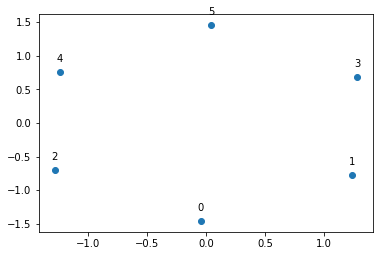

In [13]:
xs = [-0.0435, 1.2404, -1.2838, 1.2838, -1.2404, 0.0435]
ys = [-1.4573, -0.7663, -0.691, 0.6911, 0.7662, 1.4573]

labels = [_ for _ in range(6)]
plt.scatter(xs,ys)
for i, x in enumerate(xs):

    #label = "{:.2f}".format(y)
    label = str(labels[i])

    plt.annotate(label, # this is the text
                 (x,ys[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

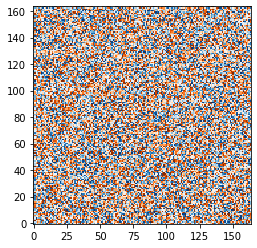

In [33]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
# make a personalised colour map for R^2 values
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

data = np.random.random((164, 164))
plt.imshow(data, cmap=newcmp, interpolation="nearest", origin="lower")
plt.show()

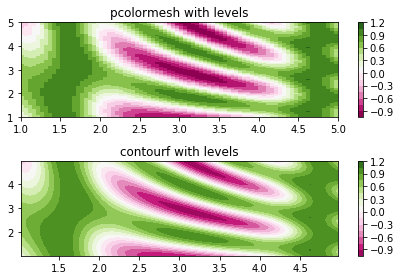

In [62]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

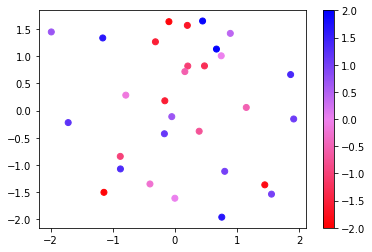

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

min_val = 0.0
max_val = 1.0
num_val = 30

# (b - a) * random_sample() + a, b > a

x = (max_val - min_val) * np.random.rand(num_val) + min_val
y = (max_val - min_val) * np.random.rand(num_val) + min_val


x,y,c = zip(*np.random.rand(30,3)*4-2)

norm=plt.Normalize(-2,2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])

plt.scatter(x,y,c=c, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

In [47]:
x = zip(*np.random.rand(30,3)*4-2)

In [48]:
for i in x:
    print(i, '\n')

(1.3812693583967048, -1.4810791278235476, -0.34385705065282846, -1.487393132702434, -0.22615569853471218, -1.9061934462806458, 1.3666440665476798, -1.972966080468272, 1.0759285857236383, 0.7456486508281732, 0.26764944268959256, -1.0097823987211347, -1.8503961406411316, -1.7895604484007048, -0.17070436944654954, 1.8394850275869628, -1.8703140876011561, -0.2762338468897765, 0.6206650775429625, 0.453271787559292, -0.7364720008658949, 1.7372725435104317, -1.8475188960194373, -1.4501411295792517, 1.4714828311790842, -0.9593087231704365, -0.5401066896593507, 1.7925322919634614, -0.7805567439161907, 0.6691031924768844) 

(-0.7866175965805993, 1.7045465639000472, 0.3177594651264197, 0.7611056820133189, 0.29726401260838387, -0.33944577480847915, 1.4434159740817574, -1.5991438479790472, 1.3616050128967592, 0.784010739900185, 1.1115997485784708, -0.8035568028718636, 0.826209486886301, 1.3324868991151617, 1.608333186250953, -0.7439364107594271, -0.973452197980003, 0.25455652826548025, 1.2895642446

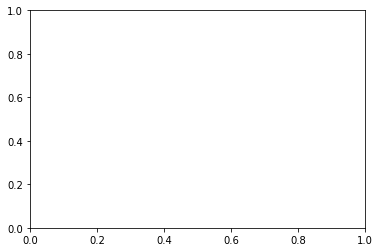

In [63]:
matrix_size = 5

d = np.identity(matrix_size)


fig, ax = plt.subplots()

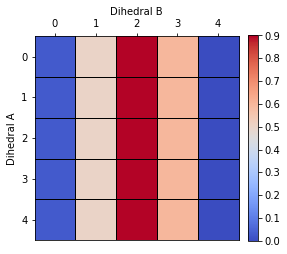

In [165]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

num_colour_samples = 9

# how to join two colour maps together
min_map = cm.get_cmap("coolwarm", num_colour_samples)
max_map = cm.get_cmap("magma", num_colour_samples)

new_colours = np.vstack((min_map(np.linspace(0,1,num_colour_samples)),
                         max_map(np.linspace(0,1,num_colour_samples))))

new_cmp = ListedColormap(new_colours, name="wintermagma")


# make a personalised colour map for R^2 values
# https://matplotlib.org/gallery/color/colormap_reference.html
#top = cm.get_cmap('Oranges_r', 128)
#bottom = cm.get_cmap('Blues', 128)

#newcolors = np.vstack((top(np.linspace(0, 1, 128)),
#                       bottom(np.linspace(0, 1, 128))))
#newcmp = ListedColormap(newcolors, name='OrangeBlue')

#data = np.random.random((164, 164))
#data = np.identity(5)

num_entries = 5
mol = "propane"
data = np.zeros((num_entries,num_entries), float)
for i in range(num_entries):
    data[i][0] = 0.03
    data[i][1] = 0.5
    data[i][2] = 0.9
    data[i][3] = 0.6
#plt.imshow(data, cmap=cm.get_cmap("coolwarm", num_colour_samples), interpolation="nearest", origin="lower", vmin=0, vmax=1)
mat = plt.matshow(data, cmap='coolwarm',interpolation="nearest")

plt.colorbar(mat, fraction=0.046, pad=0.04)
#plt.title(f"$R^2$ for each dihedral pair (A,B)\nfor molecule {mol}")
#plt.xlabel("Dihedral A", loc="top")
#plt.ylabel("Dihedral B")
#plt.show()
#plt.rc('grid', linestyle="-", color='black')
#plt.grid(True)

#set minor axes in between the labels
ax = plt.gca()
ax.set_xticks([x-0.5 for x in range(1,num_entries)],minor=True)
ax.set_yticks([y-0.5 for y in range(1,num_entries)],minor=True)
#plot grid on minor axes
plt.grid(which="minor",ls="-",lw=1)

#plt.axis([0,num_entries,0,num_entries])


ax.set_xlabel("Dihedral B")
ax.xaxis.set_label_position("top")
ax.set_ylabel("Dihedral A")

plt.tick_params(which="minor", top=False, left=False)
plt.tick_params(which="both", bottom=False)
#set x and y ticks and labels
#row_labels = range(num_entries)
#col_labels = range(num_entries)
#plt.xticks(range(num_entries), col_labels)
#plt.yticks(range(num_entries), row_labels)
plt.savefig("test.png", bbox_inches="tight", dpi=300)

In [74]:
top = cm.get_cmap('Oranges_r', 128)
top

In [85]:
for r in top:
    print(r)

TypeError: 'LinearSegmentedColormap' object is not iterable

In [179]:
from matplotlib.lines import Line2D

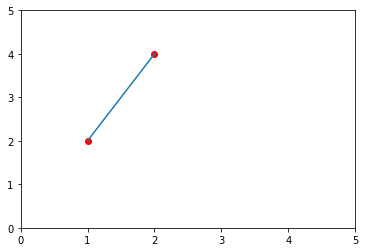

In [180]:
#fig, ax = plt.subplots(figsize=(3,3))
fig, ax = plt.subplots()
#x = [1,2,1.5,1.5]
#y = [1,1,0.5,1.5]
#line = Line2D(x, y)



x_coord = [1,2]
y_coord = [2,4]
myline = Line2D(x_coord, y_coord)
ax.add_line(myline)
ax.axis([0, 5, 0, 5])
plt.scatter(x_coord, y_coord, c='r')
plt.show()

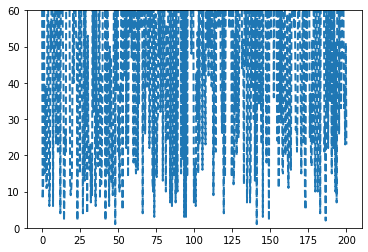

In [184]:
fig, ax = plt.subplots()
x = np.linspace(0, 200, 500)
y = np.random.randint(low=1, high=100, size=500)
ax.set_ylim(ymax=60)
line = ax.plot(x, y, '--', linewidth=2, label='foo bar')
plt.show()

[-359999.49321564095, -359999.1978498474, -359999.829512311, -359999.3971658506, -359999.54312336695, -359999.57496534585, -359999.7483844361, -359999.20727270556, -359999.22014607594, -359999.0945730974]
Max: -359995.4945821517
Min: -360003.4295106061


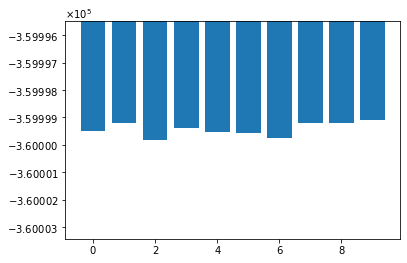

In [201]:
fig, ax = plt.subplots()
x = range(10)
y = np.random.uniform(size=10)
y = [-360_000+yi for yi in y]
print(y)

plt.bar(x=x, height=y)

min_scale = min(y)
max_scale = max(y)
if min_scale < 0:
    min_scale = 1.00001*min_scale
else:
    min_scale = 0.99999*min_scale
if max_scale < 0:
    max_scale = 0.99999*max_scale
else:
    max_scale = 1.00001*max_scale
print("Max:", max_scale)
print("Min:", min_scale)
#plt.ylim(min_scale, max_scale)
#axes = plt.gca()
ax.set_ylim([min_scale, max_scale])
ax.ticklabel_format(axis="y", style="sci", useOffset=False, scilimits=(0,0), useMathText=True)

plt.show()